In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

import pylab 

data = pd.read_csv('podol_final2.csv')
data = data.drop(columns='Unnamed: 0')
data=data.fillna(0)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

font_name = font_manager.FontProperties(fname = "/Library/Fonts/AppleGothic.ttf").get_name()
print(font_name)

plt.rcParams["font.family"] = font_name
plt.rcParams['axes.unicode_minus'] = False

AppleGothic


In [4]:
data.columns[:40]

Index(['CLAC3_NM', 'CLAC2_NM', 'CLAC1_NM', 'NUM_PD_C', 'NUM_CLNT_ID',
       'NUM_CLSE_ID', 'NUM_BRA_NM', 'TOT_HITS', 'TOT_PROFIT', 'TOT_SALES',
       'AVG_HITS', 'AVG_PROFIT', 'F', 'M', 'AGE10', 'AGE20', 'AGE30', 'AGE40',
       'AGE50', 'AGE60', 'AGE70', 'AGE80', 'TOT_SESS_SEQ', 'TOT_PAGE_VIEW',
       'TOT_SESS_HOUR', 'AVG_SESS_SEQ', 'AVG_PAGE_VIEW', 'AVG_SESS_HOUR',
       'mobile', 'desktop', 'tablet', 'April', 'May', 'June', 'July', 'August',
       'September', 'ZON_Daejeon', 'ZON_Busan', 'ZON_Gyeonggi-do'],
      dtype='object')

In [8]:
ind=list(range(0,3))+list(range(31,37))

In [9]:
month = data.iloc[:,ind]

In [10]:
month.head()

,CLAC3_NM,CLAC2_NM,CLAC1_NM,April,May,June,July,August,September
0,2단우산,우산/양산류,패션잡화,66.0,44.0,46.0,30.0,16.0,4.0
1,3단우산,우산/양산류,패션잡화,442.0,364.0,267.0,247.0,196.0,121.0
2,BB/파운데이션/컴팩트류,메이크업,화장품/뷰티케어,11386.0,13304.0,12012.0,11251.0,11471.0,9993.0
3,DIY가구,시공/DIY가구,가구,61.0,406.0,550.0,214.0,166.0,143.0
4,DIY완구,여아완구,완구,0.0,0.0,0.0,0.0,0.0,2.0


## 대분류 카테고리별 판매량

In [11]:
month1 = month.groupby('CLAC1_NM').sum()
month1.reset_index()

In [12]:
month1.head()

,April,May,June,July,August,September
CLAC1_NM,,,,,,
가구,10210.0,9565.0,9993.0,7779.0,8273.0,8492.0
건강식품,26856.0,28580.0,23155.0,24026.0,26031.0,40330.0
계절가전,721.0,2194.0,3938.0,6322.0,2112.0,161.0
과일,7017.0,5307.0,5144.0,4954.0,5714.0,12077.0
구기/필드스포츠,7220.0,8093.0,8187.0,6937.0,6405.0,5897.0


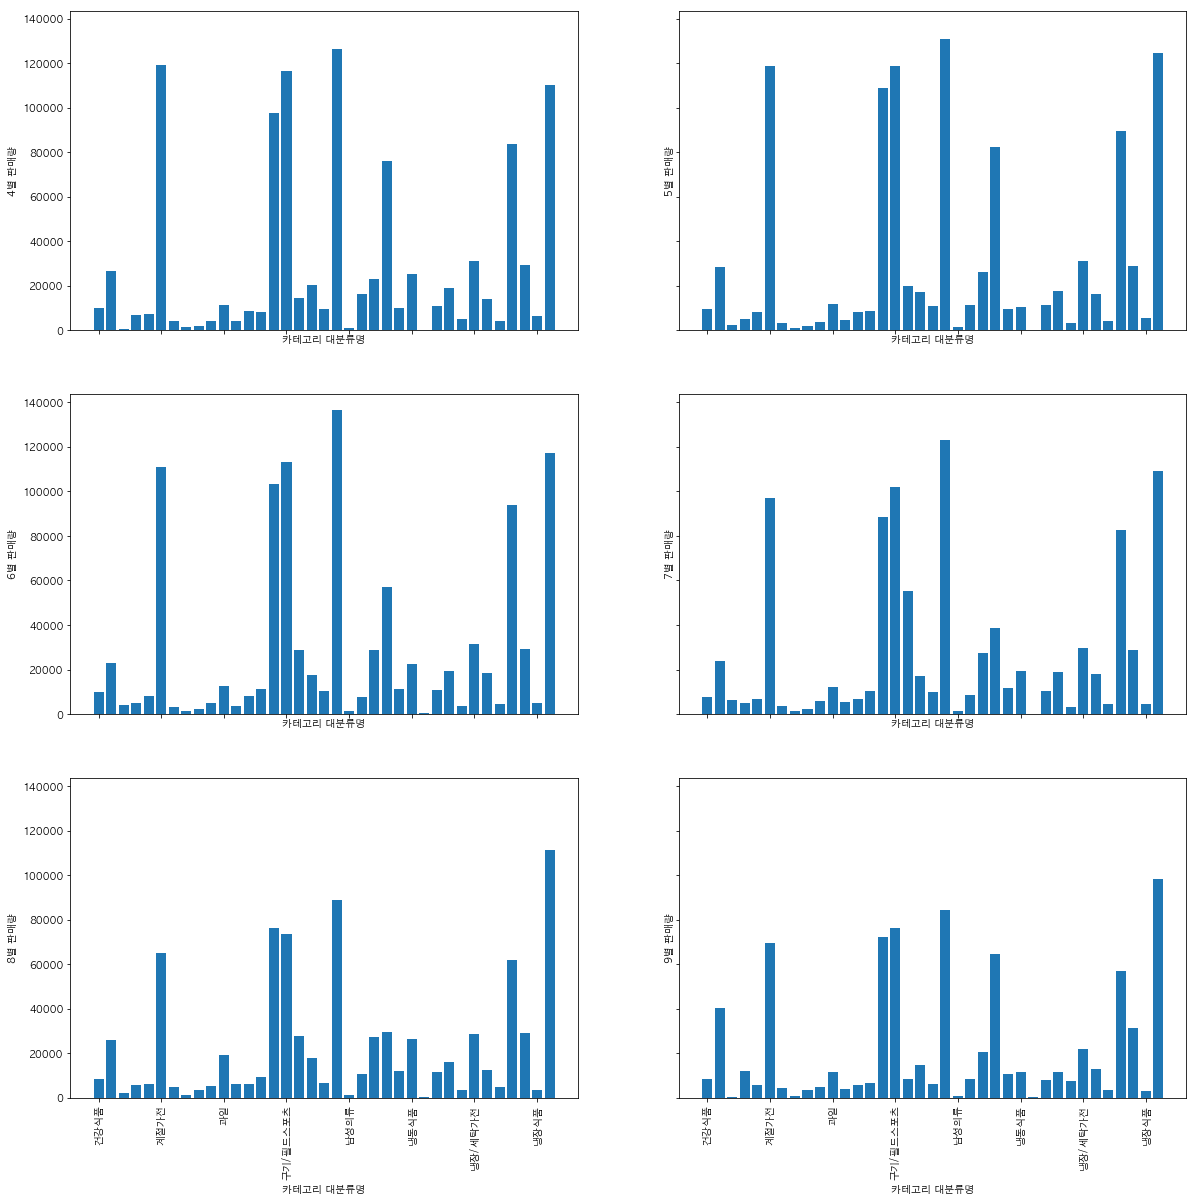

In [27]:

fig, axes = plt.subplots(3,2, figsize=(20,20), sharex=True, sharey=True)
ax = axes.ravel()
X = range(len(month1))

for i in range(6):
    ax[i].bar(X,month1.iloc[:,i])
    ax[i].set_xlabel('카테고리 대분류명')
    ax[i].set_ylabel('%d별 판매량'%(i+4))
    #plt.xticks(range(len(gender['category_name'].unique())), np.asarray(month1.index), rotation =90)
    ax[i].set_xticklabels(np.asarray(month1.index),rotation =90,minor=False)
pylab.savefig('대분류 월별 판매량.png')